In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df.csv")

In [3]:
all_match = df.drop("Participants",axis = 1).columns

In [4]:
def compute_winner(x):
    if(len(x)<4):
        if((int(x[0]) - int(x[2])) > 0):
            return "Domicile"
        elif((int(x[0]) - int(x[2])) == 0):
            return "Nul"
        else:
            return "Exterieur"
    else:
        return "Pas joué"

In [5]:
for match in all_match:
    r = match + " winner"
    df[r] = df[match].apply(lambda x : compute_winner(x))

In [6]:
df.columns

Index(['Participants', 'Suisse-Italie', 'All-Danemark', 'Angl-Slovak',
       'Esp-Georgie', 'France-Belgique', 'Portugal-Sloven',
       'Suisse-Italie winner', 'All-Danemark winner', 'Angl-Slovak winner',
       'Esp-Georgie winner', 'France-Belgique winner',
       'Portugal-Sloven winner'],
      dtype='object')

# Compute score

In [7]:
for match in all_match:
    b = match + " score_final"
    df[b] = "Pas joué"

In [8]:
df["Suisse-Italie score_final"] = "2-0"
df["All-Danemark score_final"] = "2-0"
df["Angl-Slovak score_final"] = "2-1"
df["Esp-Georgie score_final"] = "4-1"
df["Portugal-Sloven score_final"] = "0-0"


In [9]:
for match in all_match:
    s = match + " points"
    a = match + " real winner"
    int_ = match + " basic"
    score = match + " score_final"
    df[a] = df[score].apply(lambda x : compute_winner(x))
    df[s] = np.where(df[match +" score_final"] == df[match], 3, 0)
    df[int_] = np.where(df[match+" winner"] == df[a], 1, 0)
    df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
    df[s] = df[s]+df[int_]
    df.drop(int_ , axis = 1, inplace = True)

In [10]:
score_columns = [col for col in df.columns if col.endswith('points')]
df['total_score'] = df[score_columns].sum(axis=1)

# Affichage

In [11]:
affichage = ['Participants', 'Suisse-Italie', 'All-Danemark', 'Angl-Slovak',
       'Esp-Georgie', 'France-Belgique', 'Portugal-Sloven', "total_score"]
df[affichage]

,Participants,Suisse-Italie,All-Danemark,Angl-Slovak,Esp-Georgie,France-Belgique,Portugal-Sloven,total_score
0,Coco,2-1,3-1,2-0,3-0,2-1,3-0,4
1,Coco,1-1,2-1,2-1,2-0,1-1,2-0,5
2,Coco,1-2,1-1,1-0,2-1,0-0,2-1,2
3,Lisa,0-1,2-0,1-1,2-0,1-0,1-0,4
4,Lisa,0-0,1-0,2-0,3-2,0-0,1-1,4
5,Lisa,1-1,2-1,1-0,1-0,2-1,2-0,3
6,JPierre,1-1,1-0,1-0,1-0,1-0,2-0,3
7,JPierre,0-0,2-0,2-1,2-1,2-0,2-1,7
8,JPierre,1-2,2-1,2-0,2-0,2-1,1-0,3
9,Guy,2-3,2-0,3-1,2-0,2-1,2-0,5


In [12]:
test = pd.DataFrame(df.groupby(["Participants"])["total_score"].max().sort_values(ascending=False))

In [13]:
test

,total_score
Participants,
JPierre,7
Kevin,7
Irwin,6
J Yves,6
Patrice,6
Coco,5
Guy,5
Louis,5
Pascal,5


In [14]:
df[affichage].sort_values("total_score", ascending = False)

,Participants,Suisse-Italie,All-Danemark,Angl-Slovak,Esp-Georgie,France-Belgique,Portugal-Sloven,total_score
7,JPierre,0-0,2-0,2-1,2-1,2-0,2-1,7
39,Kevin,1-1,2-0,2-1,2-0,2-1,2-1,7
36,J Yves,2-1,1-0,2-1,3-0,1-0,2-0,6
26,Patrice,0-1,3-1,2-1,3-1,2-2,1-1,6
35,Irwin,2-1,2-0,2-0,2-1,1-1,2-1,6
28,JPierre,0-2,2-0,2-0,2-0,1-0,3-0,5
30,Louis,1-2,3-2,2-1,3-0,2-1,2-0,5
1,Coco,1-1,2-1,2-1,2-0,1-1,2-0,5
9,Guy,2-3,2-0,3-1,2-0,2-1,2-0,5
10,Guy,1-2,1-0,2-1,3-1,1-0,3-1,5


# Score en direct

In [15]:
test.reset_index(inplace = True)

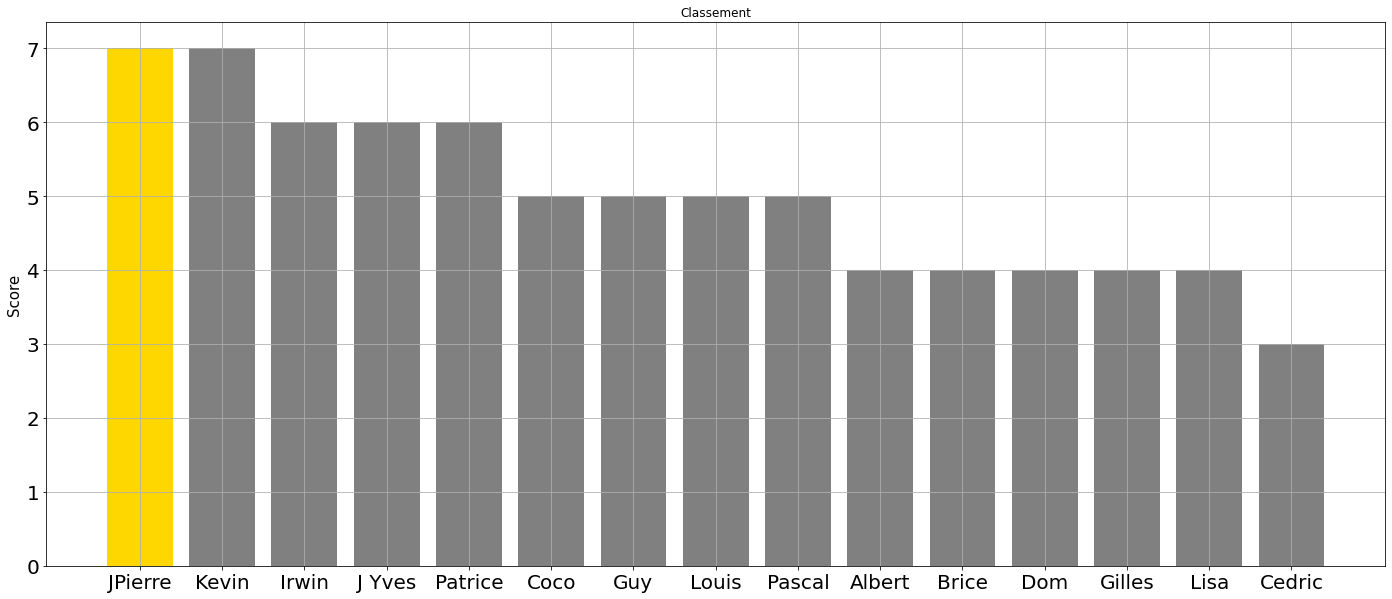

In [16]:
plt.figure(figsize=(24, 10))
plt.bar(test["Participants"],test["total_score"], color=['gold', 'grey', 'grey', "grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey"])

plt.ylabel('Score',fontsize=15)
plt.title('Classement')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.savefig('classement.png')
plt.show()

plt.close()

# Live

Match 1 details not available.
Live score: N/A N/A - N/A N/A , 


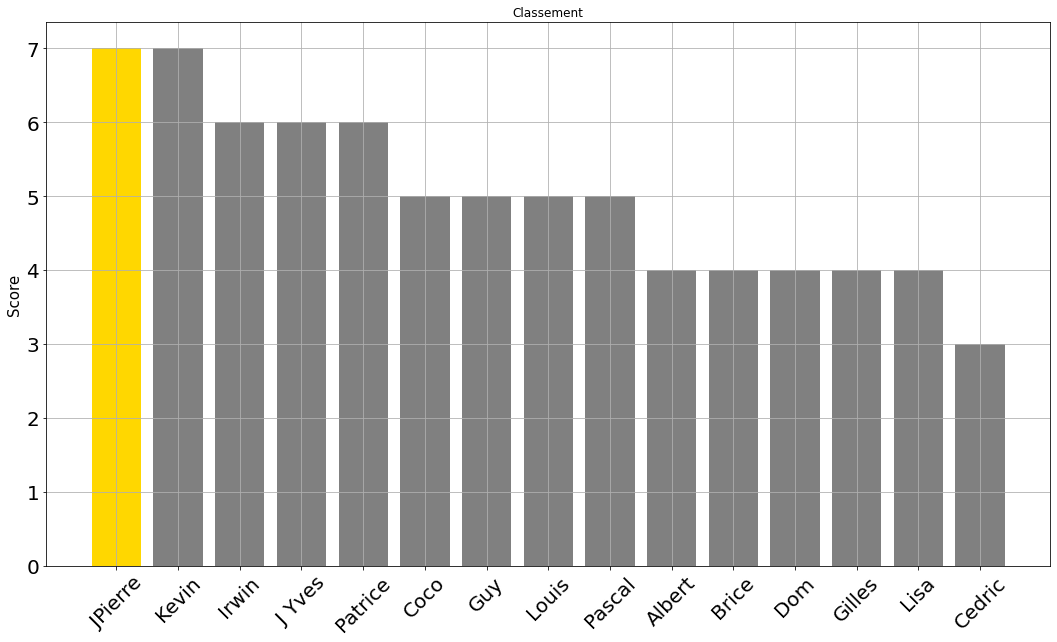

In [17]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
import time
import subprocess
from IPython.display import clear_output
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


while True:
    # Your code here
    print("This cell will re-run every 4 minutes")
    clear_output(wait=True)
    
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run Chrome in headless mode
    chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration
    chrome_options.add_argument("--no-sandbox")  # Bypass OS security model
    chrome_options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems

    # Match 1
    driver1 = webdriver.Chrome(options=chrome_options)
    driver1.get("https://www.livescore.in/fr/match/K4DPGJgf/#/resume-du-match/resume-du-match")

    # Match 2
    #driver2 = webdriver.Chrome(options=chrome_options)
    #driver2.get("https://www.livescore.in/fr/match/zXPbvcSe/#/resume-du-match/resume-du-match")

    try:
        # Initialize variables
        home_team1, domicile1, exterieur1, ext_team1 = None, None, None, None
        #home_team2, domicile2, exterieur2, ext_team2 = None, None, None, None

        # Match 1
        try:
            container1 = WebDriverWait(driver1, 10).until(
                EC.presence_of_element_located((By.ID, "detail"))
            )
            domicile1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)")
            exterieur1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(3)")
            home_team1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__home > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            ext_team1 = container1.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__away > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            
            print(domicile1.text)
            print(exterieur1.text)
            print(home_team1.text)
            print(ext_team1.text)
        except (NoSuchElementException, TimeoutException):
            print("Match 1 details not available.")
        """
        # Match 2
        try:
            container2 = WebDriverWait(driver2, 10).until(
                EC.presence_of_element_located((By.ID, "detail"))
            )
            domicile2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(1)")
            exterieur2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__score > div > div.detailScore__wrapper.detailScore__live > span:nth-child(3)")
            home_team2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__home > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            ext_team2 = container2.find_element(By.CSS_SELECTOR, "#detail > div.duelParticipant > div.duelParticipant__away > div.participant__participantNameWrapper > div.participant__participantName.participant__overflow > a")
            
            print(domicile2.text)
            print(exterieur2.text)
            print(home_team2.text)
            print(ext_team2.text)
        except (NoSuchElementException, TimeoutException):
            print("Match 2 details not available.")"""

        # Text
        live_score_text = (
            f"Live score: {home_team1.text if home_team1 else 'N/A'} {domicile1.text if domicile1 else 'N/A'} - "
            f"{exterieur1.text if exterieur1 else 'N/A'} {ext_team1.text if ext_team1 else 'N/A'} , "
            #f"{home_team2.text if home_team2 else 'N/A'} {domicile2.text if domicile2 else 'N/A'} - "
            #f"{exterieur2.text if exterieur2 else 'N/A'} {ext_team2.text if ext_team2 else 'N/A'}"
        )
        print(live_score_text)

        with open('live_score.html', 'w') as f:
            f.write(f"<p>{live_score_text}</p>")

        # Match 1 DataFrame update
        if domicile1 and exterieur1:
            df['France-Belgique score_final'] = str(domicile1.text) + "-" + str(exterieur1.text)
            s = "France-Belgique points"
            a = "France-Belgique real winner"
            int_ = "France-Belgique basic"
            score = "France-Belgique score_final"
            df[a] = df[score].apply(lambda x: compute_winner(x))
            df[s] = np.where(df["France-Belgique score_final"] == df['France-Belgique'], 3, 0)
            df[int_] = np.where(df["France-Belgique winner"] == df[a], 1, 0)
            df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
            df[s] = df[s] + df[int_]
            df.drop(int_, axis=1, inplace=True)
        """
        # Match 2 DataFrame update
        if domicile2 and exterieur2:
            df['Dan - Serb score_final'] = str(domicile2.text) + "-" + str(exterieur2.text)
            s = "Dan - Serb points"
            a = "Dan - Serb real winner"
            int_ = "Dan - Serb basic"
            score = "Dan - Serb score_final"
            df[a] = df[score].apply(lambda x: compute_winner(x))
            df[s] = np.where(df["Dan - Serb score_final"] == df['Dan - Serb'], 3, 0)
            df[int_] = np.where(df["Dan - Serb winner"] == df[a], 1, 0)
            df[int_] = df.apply(lambda row: 0 if row[s] == 3 else row[int_], axis=1)
            df[s] = df[s] + df[int_]
            df.drop(int_, axis=1, inplace=True)
        """
        # Score
        score_columns = [col for col in df.columns if col.endswith('points')]
        df['total_score'] = df[score_columns].sum(axis=1)
        test = pd.DataFrame(df.groupby(["Participants"])["total_score"].max().sort_values(ascending=False))
        test.reset_index(inplace=True)
        affichage_2 = df[affichage].sort_values("total_score", ascending=False)
        affichage_2.to_html('classement_table.html', index=False)
        
        plt.figure(figsize=(18, 10))
        plt.bar(test["Participants"], test["total_score"], color=['gold', "grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey","grey"] * 11)
        plt.ylabel('Score', fontsize=15)
        plt.title('Classement')
        plt.xticks(fontsize=20, rotation=45)
        plt.yticks(fontsize=20)
        plt.grid(True)
        plt.savefig('classement.png')
        plt.show()
        plt.close()

        status_output = subprocess.run(['git', 'status', '--porcelain'], capture_output=True, text=True).stdout.strip()

        if status_output:
            subprocess.run(['git', 'add', 'classement.png', 'index.html', 'classement_table.html', "test2.ipynb", "index.html", "live_score.html"], check=True)
            subprocess.run(['git', 'commit', '-m', 'Update classement plot'], check=True)
            subprocess.run(['git', 'push'], check=True)
    finally:
        driver1.quit()
        #driver2.quit()
    
    # Sleep for 4 minutes (4 minutes * 60 seconds)
    time.sleep(4 * 60)
